# **Load and Explore Datset**

In [3]:
import pandas as pd

# Load the dataset (replace 'your_file_path' with the actual file path)
df = pd.read_csv("/content/Phishing_Email.csv")  # Adjust the path if necessary

# Display basic information
print(df.info())
print(df.head())  # Show first 5 rows




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18255 non-null  int64 
 1   Email Text  18239 non-null  object
 2   Email Type  18254 non-null  object
dtypes: int64(1), object(2)
memory usage: 428.0+ KB
None
   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  


# **Visualize the Data**
**a. Class Distribution**

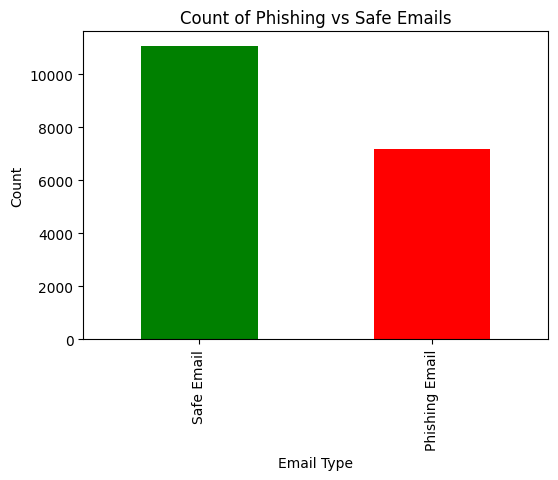

In [10]:
import matplotlib.pyplot as plt

# Count of phishing vs safe emails
plt.figure(figsize=(6,4))
df['Email Type'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.title("Count of Phishing vs Safe Emails")
plt.show()



**Word Cloud Visualization**

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text_series, title):
    # Drop NaN and empty values
    text_series = text_series.dropna()
    text_series = text_series[text_series.str.strip() != ""]

    # Check if there are words to display
    if text_series.empty:
        print(f"No data available to generate word cloud for {title}.")
        return

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_series))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Word cloud for phishing emails
generate_wordcloud(df[df['Email Type'] == 'Phishing']['Email Text'], "Phishing Emails")

# Word cloud for safe emails
generate_wordcloud(df[df['Email Type'] == 'Safe']['Email Text'], "Safe Emails")




No data available to generate word cloud for Phishing Emails.
No data available to generate word cloud for Safe Emails.


# **Importing Libraries**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Load and Preprocessing Dataset**

In [14]:
# Load dataset (assuming CSV format)
df = pd.read_csv("Phishing_Email.csv")

# Display dataset information
print(df.head())

# Preprocessing: Handling missing values
df.dropna(inplace=True)

# Feature Engineering: Extracting email content and labels
X = df['Email Text']  # Email body
y = df['Email Type']  # Phishing or Safe

# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_transformed = vectorizer.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  


# **Training and Evaluating Random Forest Model**

In [15]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluating Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9624362758250604

Random Forest Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.93      0.98      0.95      1518
    Safe Email       0.98      0.95      0.97      2209

      accuracy                           0.96      3727
     macro avg       0.96      0.96      0.96      3727
  weighted avg       0.96      0.96      0.96      3727



# **Training and Evaluating SVM Model**

In [16]:
# Support Vector Machine Model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluating SVM
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.9704856452911189

SVM Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.95      0.98      0.96      1518
    Safe Email       0.99      0.96      0.97      2209

      accuracy                           0.97      3727
     macro avg       0.97      0.97      0.97      3727
  weighted avg       0.97      0.97      0.97      3727



# **Visualization of Confusion Matrices**

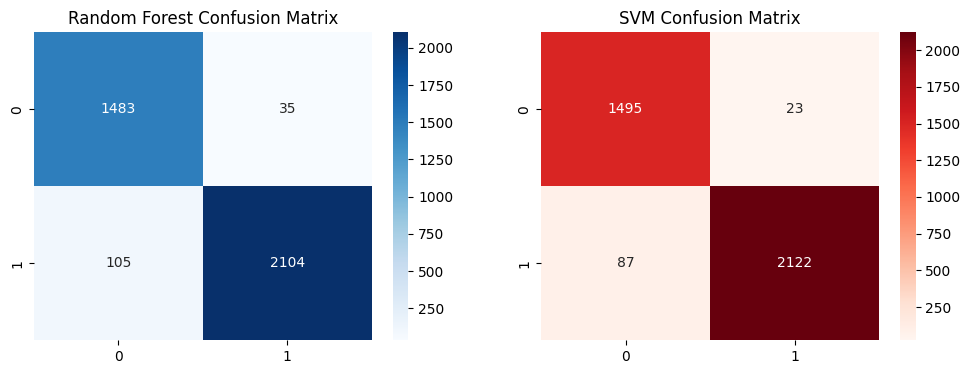

In [19]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('SVM Confusion Matrix')
plt.show()